In [2]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library("ggplot2")# note that Seurat v3, they return ggplot object for easy customization
library(parallel)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
Esr1KOM.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/backupv3/v3/Esr1KO_M/01_analysis/cellranger_count_v2/P50Esr1KO/raw_feature_bc_matrix")
colnames(Esr1KOM.data) = paste0(colnames(Esr1KOM.data),"Esr1KOM")
Esr1KOM<- CreateSeuratObject(counts = Esr1KOM.data, min.cells = 3, min.features = 200, project = "10X_MPOA")
Neuron_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/all_cells/Neuron_bid.rds")
Esr1KOM<-subset(x = Esr1KOM, cells=Neuron_id)
Esr1KOM@meta.data$stim <- "Esr1KOM"

Centering and scaling data matrix

Warning message:
“Removed 28000 rows containing missing values (geom_point).”


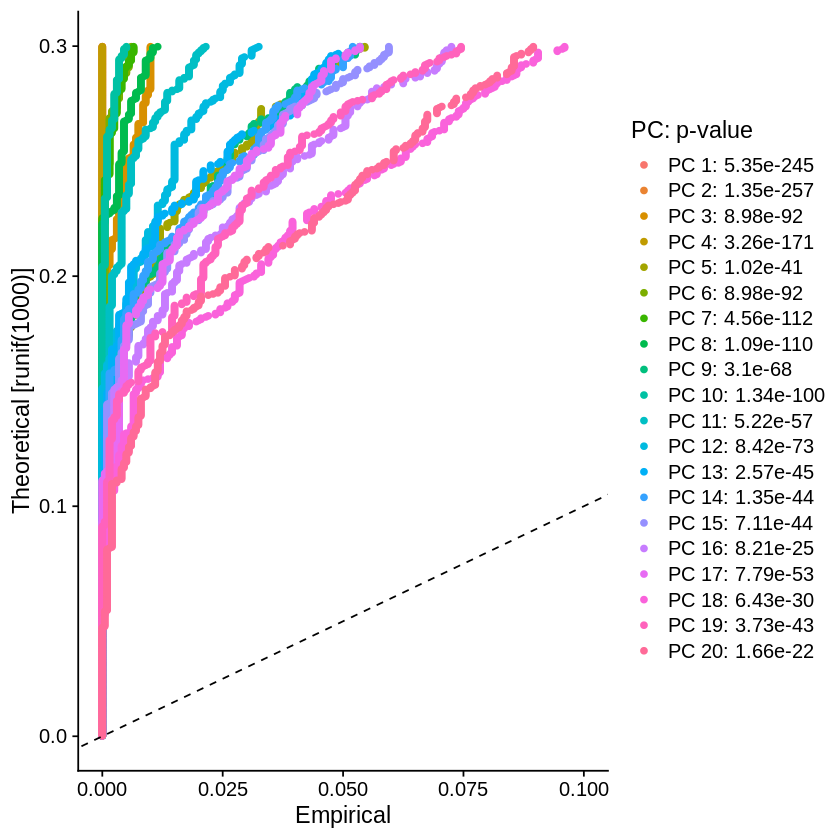

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4761
Number of edges: 172641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8520
Number of communities: 21
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:35:48 UMAP embedding parameters a = 0.9922 b = 1.112

18:35:48 Read 4761 rows and found 30 numeric columns

18:35:48 Using Annoy for neighbor search, n_neighbors = 30

18:35:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:35:49 Writing NN index file to temp file /tmp/RtmpxDWD8D/file30c113a2107d

18:35:49 Searching Annoy index using 1 thread, search_k = 3000

18:35:50 Annoy recall = 100%

18:35:50 Commencing smooth kNN distance calibration using 1 thread

18:35:50 Initializing fro

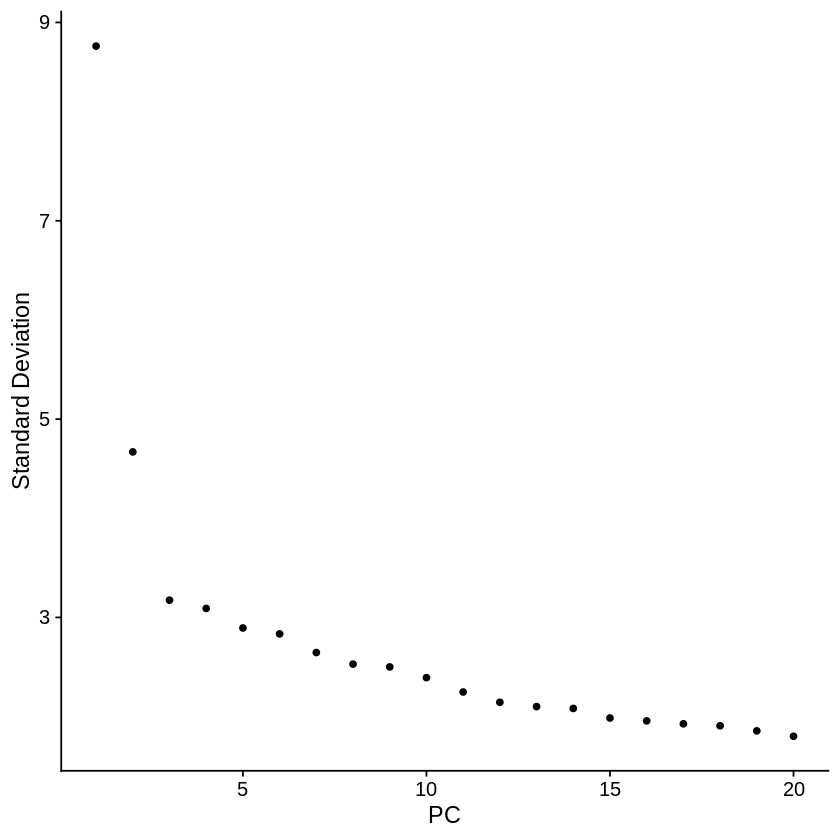

In [3]:
Esr1KOM<- NormalizeData(object = Esr1KOM,verbose = FALSE) 
Esr1KOM<- FindVariableFeatures(object =Esr1KOM,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
Esr1KOM<- ScaleData(object = Esr1KOM, features = rownames(x =Esr1KOM))
Esr1KOM<- RunPCA(object = Esr1KOM, features = VariableFeatures(object =Esr1KOM), verbose = FALSE)
Esr1KOM <- JackStraw(object =Esr1KOM, num.replicate = 100)
Esr1KOM <- ScoreJackStraw(object = Esr1KOM, dims = 1:20)
JackStrawPlot(object = Esr1KOM, dims = 1:20)
ElbowPlot(object =Esr1KOM)
Esr1KOM <- FindNeighbors(object =Esr1KOM, dims = 1:30)
Esr1KOM <- FindClusters(object = Esr1KOM, resolution = 0.8)
Esr1KOM<- RunUMAP(object = Esr1KOM, reduction = "pca", dims = 1:30)


In [5]:
DefaultAssay(Esr1KOM) <- "RNA"

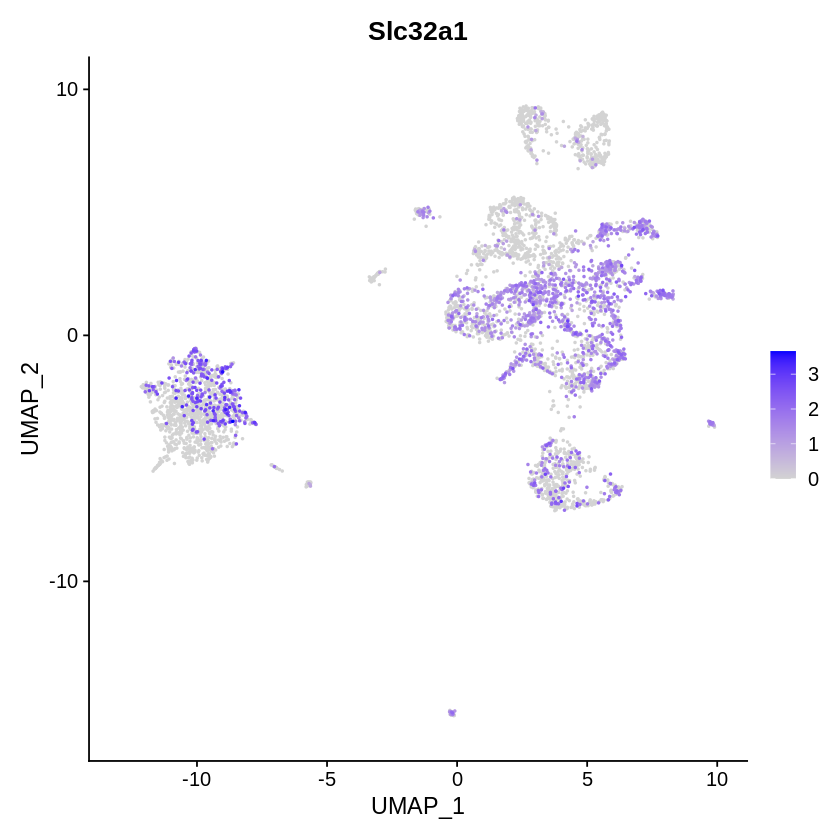

In [13]:
FeaturePlot(object =Esr1KOM, features = c("Slc32a1"),order=TRUE)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/disc_Esr1KOM_all_#rev3_com#feature_Vgat.pdf",width=10,height=10)

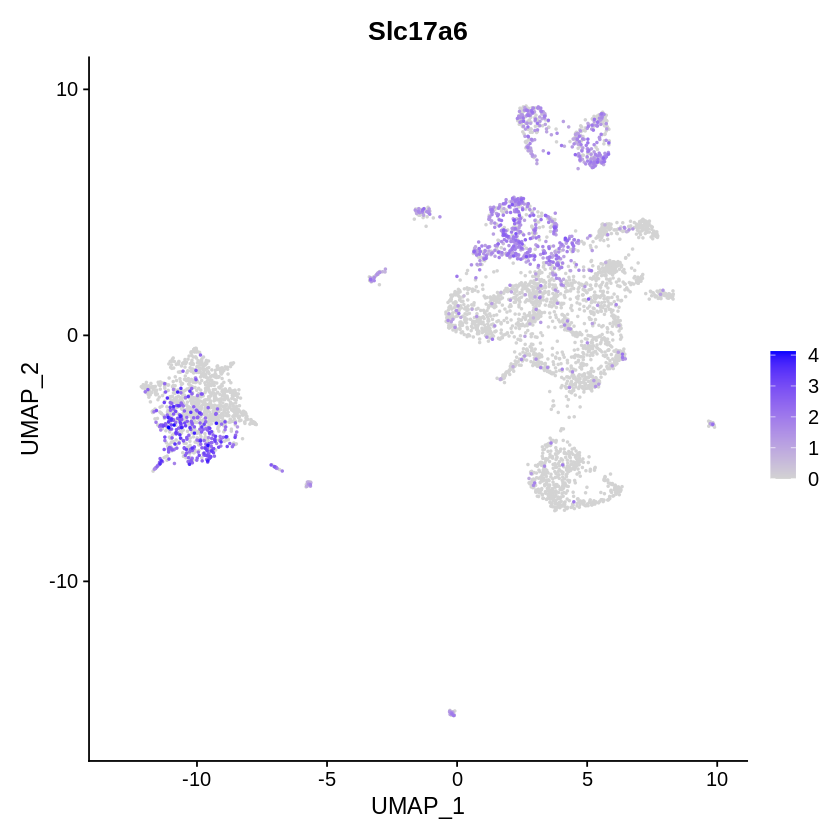

In [14]:
FeaturePlot(object =Esr1KOM, features = c("Slc17a6"),order=TRUE)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/disc_Esr1KOM_all_#rev3_com#feature_Vglu.pdf",width=10,height=10)

In [13]:
saveRDS(Esr1KOM,file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")

In [5]:
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Vglu2","Vglu3","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Mix2","Vgat10","Vglu4","Vgat11","Vglu5","Vgat12","Vglu6","Ambiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}

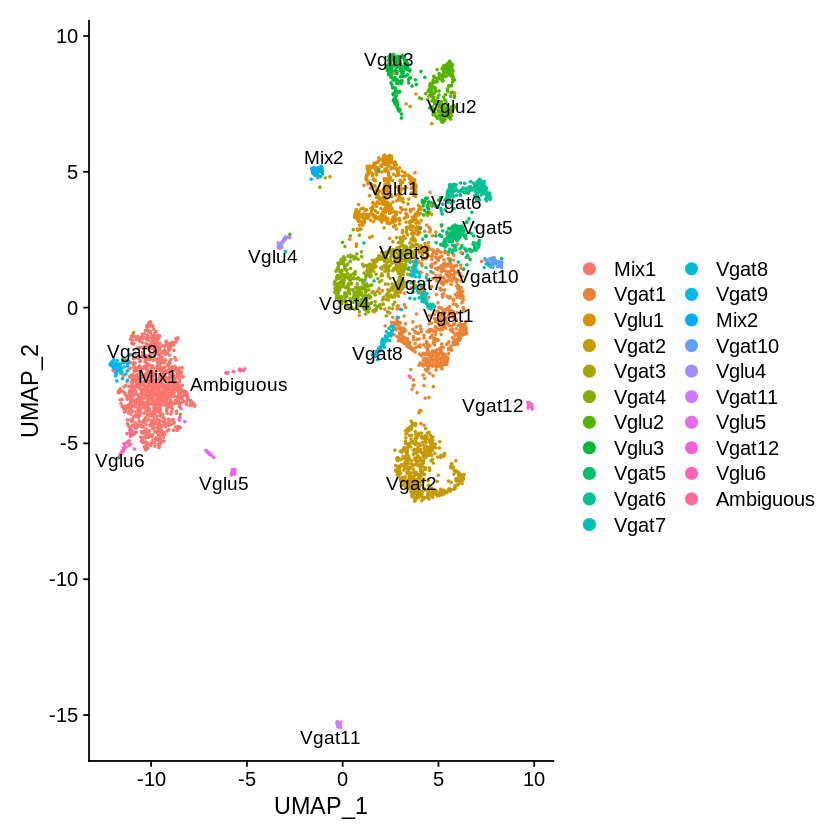

In [19]:
DimPlot(object = Esr1KOM, reduction = "umap", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/umap_name.pdf",width=10,height=10)

In [ ]:
violin/disc

In [6]:
#start from here
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("eMix1","eVgat1","eVglu1","eVgat2","eVgat3","eVgat4","eVglu2","eVglu3","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eMix2","eVgat10","eVglu4","eVgat11","eVglu5","eVgat12","eVglu6","eAmbiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}

In [15]:
# UMI, gene, fraction, UMAP

In [7]:
Esr1KOM@meta.data$celltype<-Idents(Esr1KOM)
Celltype<-c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eVgat10","eVgat11","eVgat12","eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eMix1","eMix2")
Esr1KOM<-subset(Esr1KOM,cells=rownames(Esr1KOM@meta.data)[Esr1KOM@meta.data$celltype %in% Celltype])
Esr1KOM@meta.data$celltype<-factor(Esr1KOM@meta.data$celltype,levels=Celltype)
Idents(Esr1KOM)<-factor(Idents(Esr1KOM),levels=Celltype)

In [20]:
#colors<-rep("cyan4",length(unique(Esr1KOM@meta.data$celltype)))

In [35]:
colors<-color<-c("lightblue","lightskyblue","skyblue","deepskyblue","lightsteelblue",
         "dodgerblue","cornflowerblue","steelblue","cadetblue","mediumslateblue",
         "slateblue","darkslateblue","lightsalmon","salmon","darksalmon","lightcoral","indianred",
         "#DC143C","darkgray","dimgray")

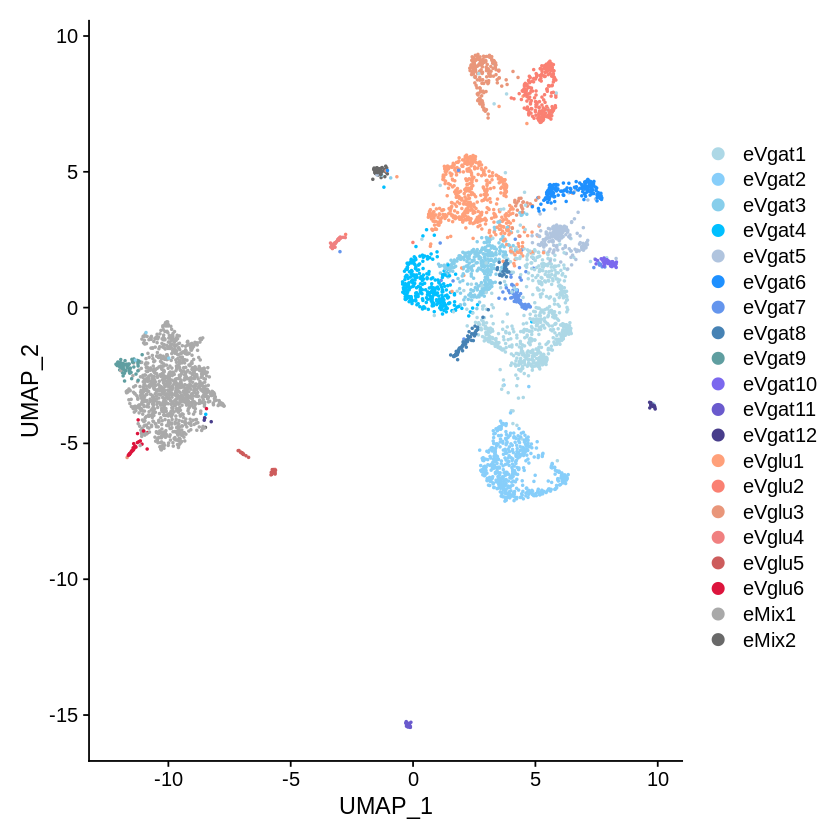

In [39]:
#UMAP
DimPlot(object = Esr1KOM, reduction = "umap", label = FALSE, repel = TRUE,cols=color) 
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOM_neuron_umap_name_rec#3com#4.pdf",width=10,height=10)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


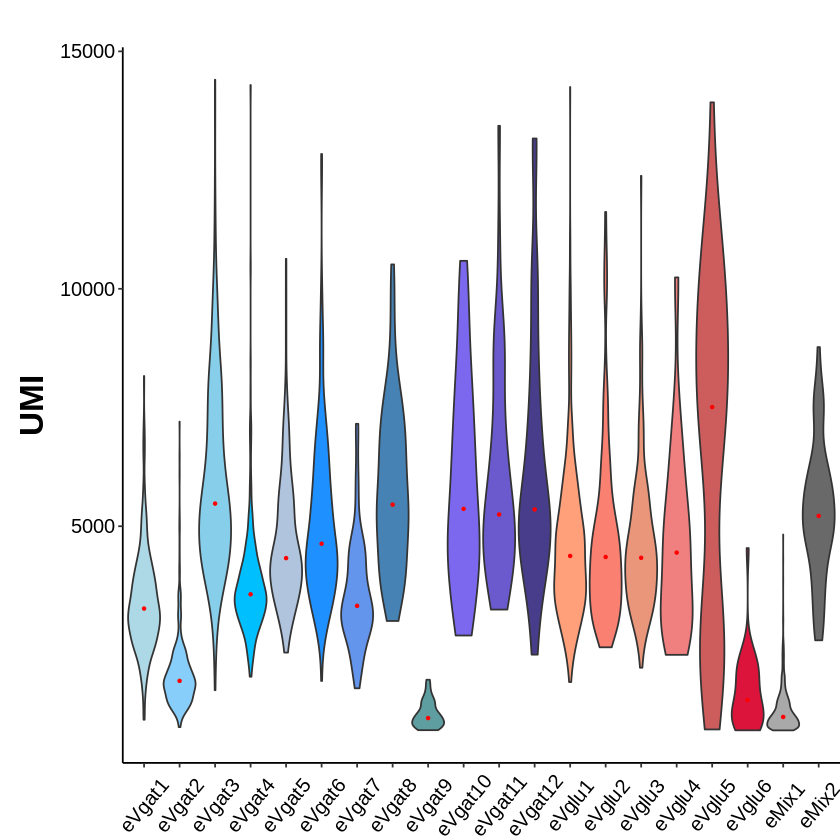

In [40]:
#UMI
ggplot(Esr1KOM@meta.data,aes_string(x="celltype",y="nCount_RNA",fill="celltype"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("UMI")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=12,color="black"),axis.title.y=element_text(size=20,angle=90,color="black",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=12,h=0.5,v=0.5,angle=50,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(1, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOM_UMI_neuroncelltype_rev#3com4.pdf",height=2, width=10 , paper = "letter")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


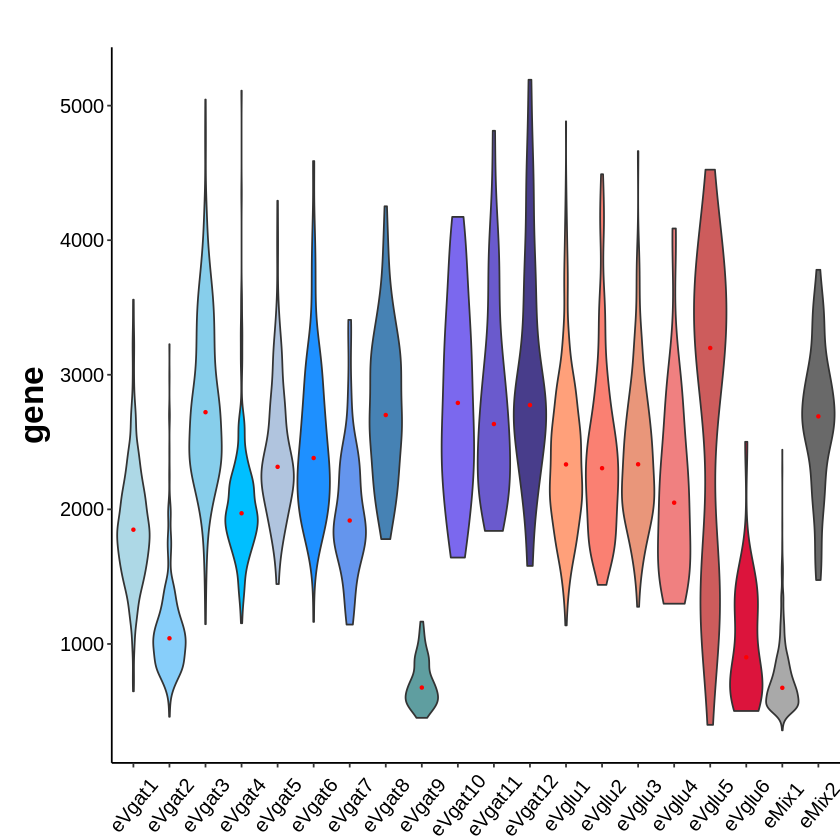

In [41]:
#gene
ggplot(Esr1KOM@meta.data,aes_string(x="celltype",y="nFeature_RNA",fill="celltype"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("gene")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=12,color="black"),axis.title.y=element_text(size=20,angle=90,color="black",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=12,h=0.5,v=0.5,angle=50,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(1, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOM_gene_neuroncelltype_rev#3com4.pdf",height=2, width=10 , paper = "letter")

In [48]:
#fraction
Cell_type<-Celltype
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-dim(subset(Esr1KOM@meta.data,celltype==Cell_number$type[i]))[1]}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*Cell_number$len[i]/sum(Cell_number$len)}
Cell_number$prop<-proportion

Cell_number$type<-factor(Cell_number$type,levels=Celltype)

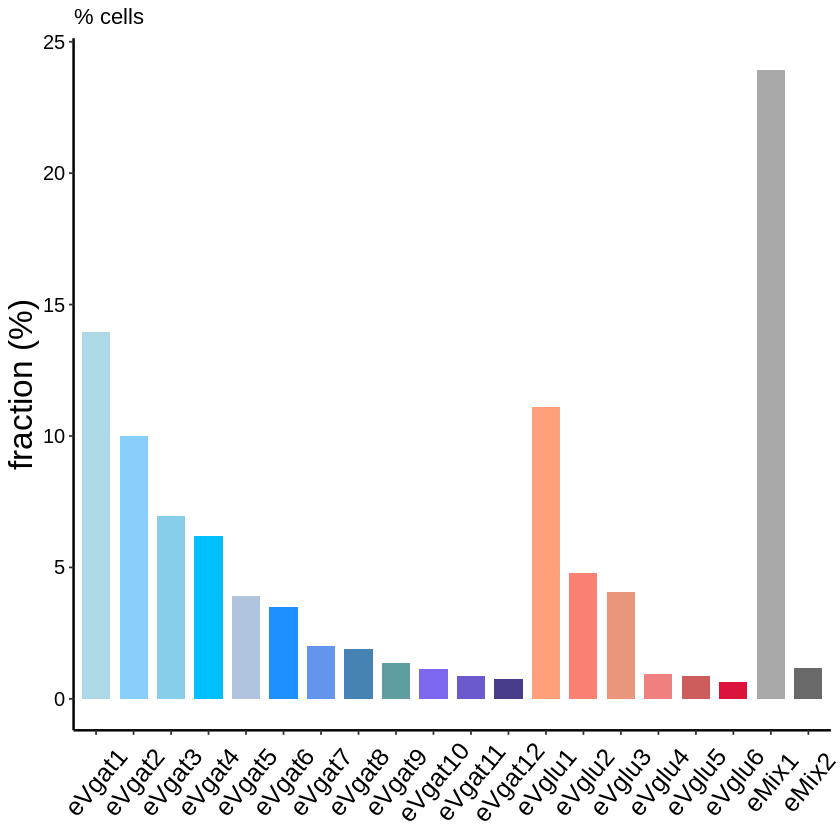

In [55]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=type, width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("fraction (%)")+
scale_fill_manual(values=colors)+scale_x_discrete(limits = (levels(Cell_number$type)))+
theme(legend.position="none",axis.title.x=element_text(size=0),axis.title.y=element_text(size=20,color="black"),axis.text.y=element_text(size=12,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust =0.5,v=0.5,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.7))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOM_neuroncelltypefraction_rev#3com4.pdf",height=6, width=10 , paper = "letter")

In [1]:
#disc plot

In [44]:
#ext fig7
Cell_type<-factor(rev(c("eVgat7","eVgat3","eVgat4","eVgat8","eVgat9","eVgat10","eVgat2","eVgat1","eVgat5","eVgat6")),levels=rev(c("eVgat7","eVgat3","eVgat4","eVgat8","eVgat9","eVgat10","eVgat2","eVgat1","eVgat5","eVgat6")))
gene_list<-c("Slc32a1","Slc17a6","Ar","Esr1")

In [9]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(Esr1KOM@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(Esr1KOM@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(Esr1KOM@assays$RNA@data[gene_list[i],]))/sd(Esr1KOM@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] eMix2   eMix1   eVglu6  eVglu5  eVglu4  eVglu3  eVglu2  eVglu1  eVgat12
[10] eVgat11 eVgat10 eVgat9  eVgat8  eVgat7  eVgat6  eVgat5  eVgat4  eVgat3 
[19] eVgat2  eVgat1  eMix2   eMix1   eVglu6  eVglu5  eVglu4  eVglu3  eVglu2 
[28] eVglu1  eVgat12 eVgat11 eVgat10 eVgat9  eVgat8  eVgat7  eVgat6  eVgat5 
[37] eVgat4  eVgat3  eVgat2  eVgat1 
20 Levels: eMix2 eMix1 eVglu6 eVglu5 eVglu4 eVglu3 eVglu2 eVglu1 ... eVgat1

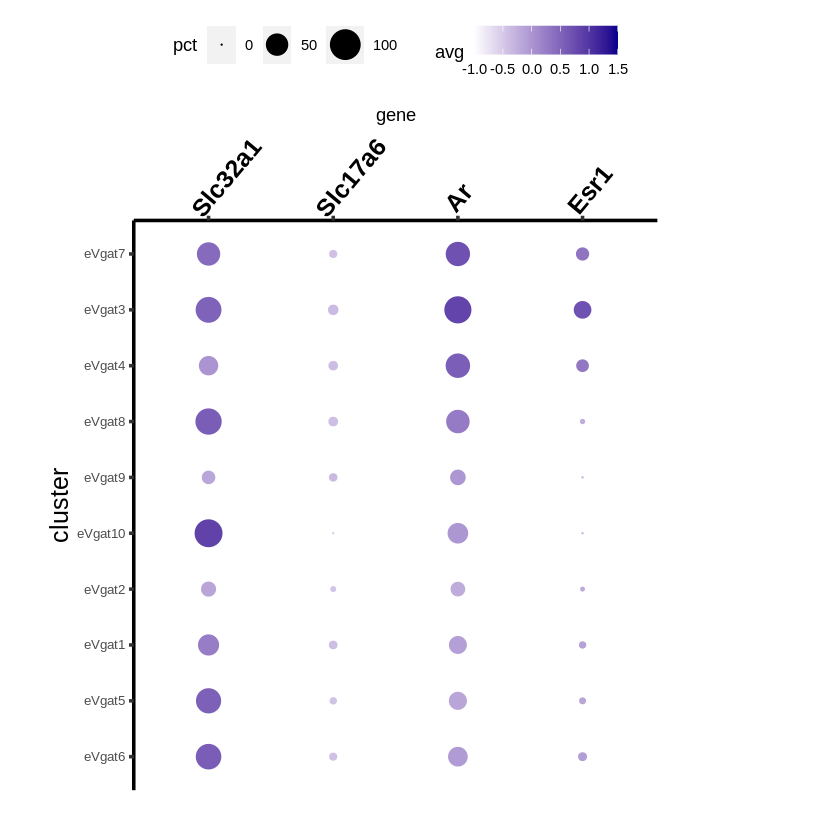

In [52]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =rev(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) +scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=15,angle = 50, hjust = 0.1,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),,legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 110,30, 30))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/disc_hormone_vglu.pdf",height=7, width=3.9 , paper = "letter")

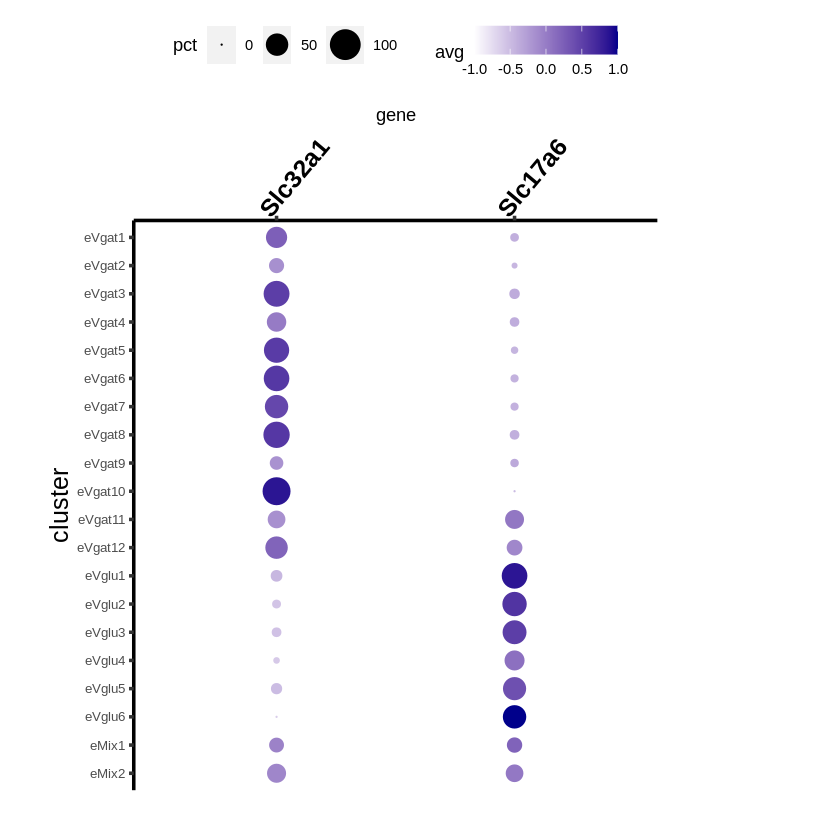

In [11]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =rev(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1),breaks=seq(-1,1,0.5),oob=squish) +scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=15,angle = 50, hjust = 0.1,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),,legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 110,30, 30))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/disc_Esr1KOM_all_#rev3_com#.pdf",height=7, width=3.9 , paper = "letter")

In [181]:
Cell_type<-rev(c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eVgat10","eVgat11","eVgat12"))
gene_list<-c("Slc32a1","Ar","Esr1","Dlx1")

In [182]:
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))

Cell_number_t<- data.frame("type" =c(rep(Cell_type[i],L)))
#used normalized uncorrected data
for (p in 1:length(gene_list)){
Cell_number_t[gene_list[p]]<-as.vector(Esr1KOM@assays$RNA@data[gene_list[p],eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}

as.factor(Cell_number$type)

[1] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [10] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [19] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [28] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [37] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [46] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [55] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [64] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [73] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [82] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [91] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [100] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [109] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [118] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [127] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [136] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [145] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [154] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [163] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [172] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [181] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [190] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [199] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [208] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [217] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [226] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [235] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [244] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [253] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [262] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [271] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [280] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [289] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [298] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [307] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [316] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [325] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [334] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [343] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [352] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [361] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [370] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [379] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [388] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [397] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [406] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [415] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [424] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [433] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [442] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [451] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1

In [183]:
colors<-rep("dodgerblue4",12)

In [184]:
for (k in 1:length(gene_list))
    {
if (k==length(gene_list)){assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        ,axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.text.x=element_text(size=12,face="bold",color="black",angle = 90, hjust =0,margin = margin(t = 2, r =0, b = 0, l =0)),axis.title.y=element_text(size=12,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 10)), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}
else{
    assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(), axis.ticks.x=element_blank(),axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.title.y=element_text(size=12,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 10)), axis.title=element_text(size=12,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}

}

In [185]:
library(grid)

In [186]:
#for Slc32a1,gene_list<-c("Slc32a1","Slc17a6","Dlx1","Ar","Esr1","Pgr","Moxd1")
merge<-list()
for (i in length(gene_list):1){   
       if (length(merge)==0){
        merge<-ggplotGrob(eval(parse(text=paste("P",i,sep = ""))))}else{merge<-rbind(ggplotGrob(eval(parse(text=paste("P",i,sep = "")))),merge,size = "last")}}

#all gene
pdf(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/stackplotviolin_all_clusters_hormone",".pdf",sep=""),height=3,width=18, paper = "letter")
grid.newpage()
grid.draw(merge)
dev.off()

png 
  2

start from here

In [56]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [59]:
MPOA.integrated@meta.data$celltype<-Idents(MPOA.integrated)

In [58]:
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("eMix1","eVgat1","eVglu1","eVgat2","eVgat3","eVgat4","eVglu2","eVglu3","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eMix2","eVgat10","eVglu4","eVgat11","eVglu5","eVgat12","eVglu6","eAmbiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}
Esr1KOM@meta.data$celltype<-Idents(Esr1KOM)
#Celltype may change
Celltype<-c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eVgat10","eVgat11","eVgat12","eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eMix1","eMix2")

Esr1KOM<-subset(Esr1KOM,cells=rownames(Esr1KOM@meta.data)[Esr1KOM@meta.data$celltype %in% Celltype])
Esr1KOM@meta.data$celltype<-factor(Esr1KOM@meta.data$celltype,levels=Celltype)
Idents(Esr1KOM)<-factor(Idents(Esr1KOM),levels=Celltype)

In [347]:
celltype<-c(eVglu1_barcode,eVglu2_barcode,eVglu3_barcode,eVglu4_barcode,eVglu5_barcode,eVglu6_barcode)

# correlation KO and scRNAseq


In [28]:
#for extFig7, remove Vgat20
MPOA_type<-c("Vgat6","Vgat2","Vgat16","Vgat4","Vgat10","Vgat13","Vgat8","Vgat17","Vgat1","Vgat3","Vgat14","Vgat5","Vgat7","Vgat11","Vgat9","Vgat19","Vgat15","Vgat18","Vgat12")
Esr1KOM_type<-rev(c("eVgat7","eVgat3","eVgat4","eVgat8","eVgat9","eVgat10","eVgat2","eVgat1","eVgat5","eVgat6"))

In [29]:
corr<- data.frame(matrix(NA, ncol=length(MPOA_type),nrow=length(Esr1KOM_type)))
rownames(corr)<-factor(Esr1KOM_type,levels=Esr1KOM_type)
colnames(corr)<-factor(MPOA_type,levels=MPOA_type)

In [30]:
p_value<- data.frame(matrix(NA, ncol=length(MPOA_type),nrow=length(Esr1KOM_type)))
rownames(p_value)<-factor(Esr1KOM_type,levels=Esr1KOM_type)
colnames(p_value)<-factor(MPOA_type,levels=MPOA_type)

In [31]:
genes<-intersect(rownames(Esr1KOM@ reductions$ pca@ feature.loadings),rownames(MPOA.integrated@assays$RNA@data))
MPOA_exp<-MPOA.integrated@assays$RNA@data[genes,]
Esr1KOM_exp<- Esr1KOM@assays$RNA@data[genes,]

In [32]:
length(genes)

[1] 1999

In [33]:
MPOA_exp<-t(scale(t(as.matrix(MPOA_exp))))
Esr1KOM_exp<-t(scale(t(as.matrix(Esr1KOM_exp))))

In [34]:
for (i in 1:length(MPOA_type)){
    for (j in 1:length(Esr1KOM_type)){
        test1<-Esr1KOM_exp[,eval(parse(text = paste(Esr1KOM_type[j],"_barcode",sep="")))]
rownames(test1) <- c()
test1<-rowMeans(test1)
include1<-is.na(test1)
test2<-MPOA_exp[,eval(parse(text = paste(MPOA_type[i],"_barcode",sep="")))]
rownames(test2) <- c()
test2<-rowMeans(test2)
include2<-is.na(test2)
include<-(include1+include2)==0
test1<-test1[include]
test2<-test2[include]

    corr[j,i]<-cor(test1,test2)
}}

In [35]:
for (i in 1:length(MPOA_type)){
    for (j in 1:length(Esr1KOM_type)){
          test1<-Esr1KOM_exp[,eval(parse(text = paste(Esr1KOM_type[j],"_barcode",sep="")))]
rownames(test1) <- c()
test1<-rowMeans(test1)
include1<-is.na(test1)
test2<-MPOA_exp[,eval(parse(text = paste(MPOA_type[i],"_barcode",sep="")))]
rownames(test2) <- c()
test2<-rowMeans(test2)
include2<-is.na(test2)
include<-(include1+include2)==0
test1<-test1[include]
test2<-test2[include]
   p_value[j,i]<-cor.test(test1,test2)[[3]]}}

In [36]:
library("reshape2")

In [37]:
test.m <- melt(as.matrix(corr))

In [38]:
library(scales)

In [39]:
test.p <- melt(as.matrix(p_value))

In [40]:
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.05){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}

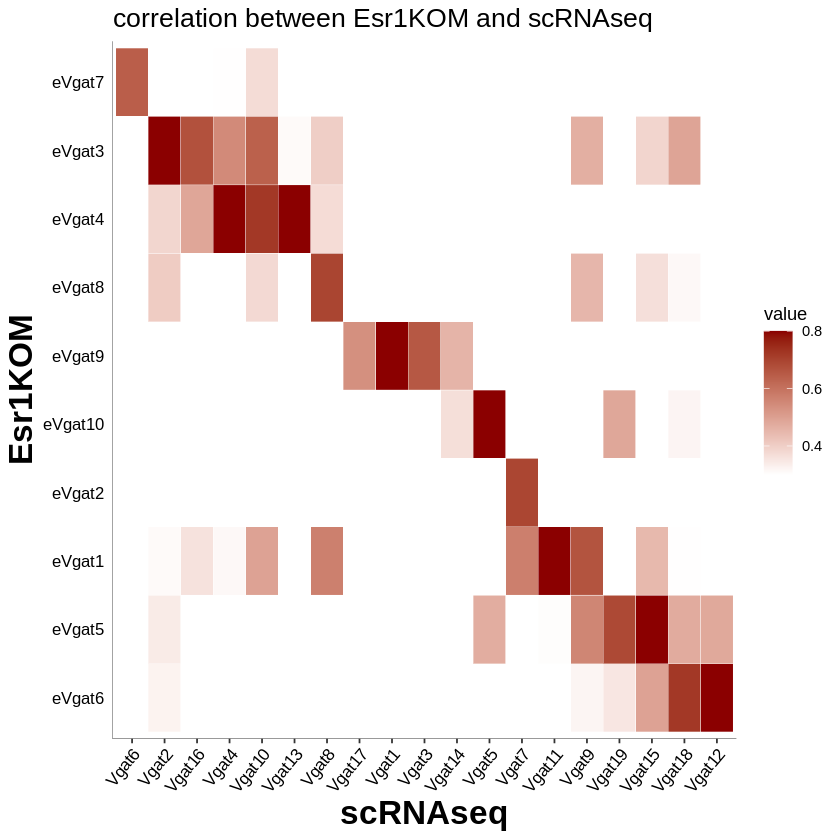

In [41]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0.3,0.8), breaks=seq(0.0,0.8,by=0.2),low = "white",high = "darkred", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Esr1KOM")+xlab("scRNAseq")+theme(axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=10,,angle = 50, hjust =1,colour = "black"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between Esr1KOM and scRNAseq")
print(pp)

In [42]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0.3,0.8), breaks=seq(0.0,0.8,by=0.2),low = "white",high = "darkred", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Esr1KOM")+xlab("scRNAseq")+theme(axis.text.y=element_text(size=15,colour = "black",face="bold"),axis.text.x=element_text(size=14,,angle = 50, hjust =1,colour = "black",face="bold"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 1),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/correlation_vgat.pdf",height=5, width=10 , paper = "letter")

In [81]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0.3,0.8), breaks=seq(0.0,0.8,by=0.2),low = "white",high = "darkred", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Esr1KOM")+xlab("scRNAseq")+theme(axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=12,,angle = 50, hjust =1,colour = "black"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between Esr1KOM and scRNAseq")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/correlation_vglu.pdf",height=2.2, width=10 , paper = "letter")

# reference based projection

In [61]:
#for S-Fig, remove Vgat20 as no correspondence with Vgat20 in correlation analysis
MPOA_type<-c("Vgat6","Vgat2","Vgat16","Vgat4","Vgat10","Vgat13","Vgat8","Vgat17","Vgat1","Vgat3","Vgat14","Vgat5","Vgat7","Vgat11","Vgat9","Vgat19","Vgat15","Vgat18","Vgat12")
Esr1KOM_type<-rev(c("eVgat7","eVgat3","eVgat4","eVgat8","eVgat9","eVgat10","eVgat2","eVgat1","eVgat5","eVgat6"))

In [62]:
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(MPOA.integrated@meta.data)[MPOA.integrated@meta.data$celltype %in% MPOA_type])
Esr1KOM<-subset(Esr1KOM,cells=rownames(Esr1KOM@meta.data)[Esr1KOM@meta.data$celltype %in% Esr1KOM_type])

In [66]:
POA.list<-objects() #maybe better using POA.list<-vector(mode = "list")
POA.list$MPOA.integrated<-MPOA.integrated
POA.list$Esr1KOM<-Esr1KOM
reference.list <- POA.list[c("MPOA.integrated","Esr1KOM")]

Warning message in POA.list$MPOA.integrated <- MPOA.integrated:
“Coercing LHS to a list”


In [ ]:
MPOA.integrated

In [68]:
help(FindTransferAnchors)

In [70]:
genes<-intersect(rownames(Esr1KOM@ reductions$ pca@ feature.loadings),rownames(MPOA.integrated@assays$RNA@data))

In [108]:
POA.anchors <- FindTransferAnchors(reference = MPOA.integrated, query = Esr1KOM, reduction = "cca", dims = 1:10,features=genes)

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8846 anchors

Filtering anchors

	Retained 5909 anchors



In [109]:
predictions <- TransferData(anchorset = POA.anchors, refdata = MPOA.integrated$celltype, weight.reduction="cca",  dims = 1:10)
Esr1KOM <- AddMetaData(Esr1KOM, metadata = predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [110]:
Esr1KOM@meta.data$celltype<-factor(Esr1KOM@meta.data$celltype,levels=Esr1KOM_type)
Esr1KOM@meta.data$predicted.id<-factor(Esr1KOM@meta.data$predicted.id,levels=MPOA_type)

In [152]:
meta <- Esr1KOM@meta.data %>% select(celltype, predicted.id) %>% group_by(celltype, .drop = FALSE) %>% count(celltype, predicted.id)
adjusted<-numeric()
for(i in 1:dim(meta)[1]){
    adjusted[i]<-100*meta$n[i]/sum(subset(meta,predicted.id==meta$predicted.id[i])$n)
}
meta$adjusted<-adjusted

In [153]:
meta<-meta[meta$predicted.id %in% c("Vgat2","Vgat4","Vgat16"),]

In [154]:
meta$celltype<-factor(meta$celltype,levels=Esr1KOM_type)
meta$predicted.id<-factor(meta$predicted.id,levels=c("Vgat2","Vgat4","Vgat16"))

In [155]:
unique(meta$celltype)

[1] eVgat6  eVgat5  eVgat1  eVgat2  eVgat10 eVgat9  eVgat8  eVgat4  eVgat3 
[10] eVgat7 
10 Levels: eVgat6 eVgat5 eVgat1 eVgat2 eVgat10 eVgat9 eVgat8 eVgat4 ... eVgat7

In [160]:
colors=c(c("eVgat7"="lightblue","eVgat3"="darkblue","eVgat4"="indianred","eVgat8"="lightskyblue","eVgat9"="skyblue","eVgat10"="lightgray","eVgat2"="darkgray","eVgat1"="lightsalmon","eVgat5"="darkgray","eVgat6"="dimgray"))

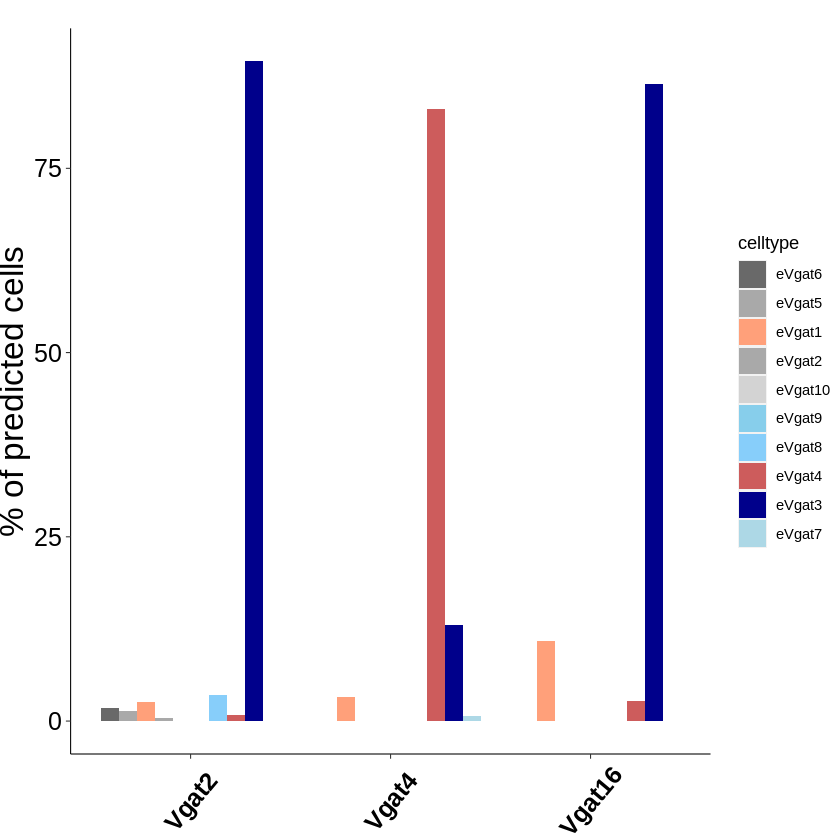

In [161]:
#% of scRNAseq Vgat Esr1 cell types predicted in KO data
ggplot(meta,aes(x=predicted.id,y=adjusted,fill=celltype,group=celltype))+geom_bar(position="dodge",stat = "identity")+ylab("% of predicted cells")+
scale_fill_manual(values=colors)+
theme(axis.title.y=element_text(size=20,color="black"),axis.title.x=element_blank(),axis.text.y=element_text(size=15,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 0.5,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.3),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size =0.3), plot.margin = unit(c(0.6, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOM_number_of_predicted_celltype_rev#3_com#4.pdf",height=3, width=10 , paper = "letter")


In [63]:
help(FindTransferAnchors)

# DEG analysis

In [2]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("eMix1","eVgat1","eVglu1","eVgat2","eVgat3","eVgat4","eVglu2","eVglu3","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eMix2","eVgat10","eVglu4","eVgat11","eVglu5","eVgat12","eVglu6","eAmbiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}

In [3]:
DefaultAssay(Esr1KOM) <- "RNA"
#celltype<-c(eVgat3_barcode,eVgat4_barcode,eVgat7_barcode) #not used
celltype<-c(eVgat3_barcode,eVgat4_barcode)
KO<-subset(Esr1KOM,cells=celltype)

In [4]:
DefaultAssay(MPOA.integrated) <- "RNA"
temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
Intact<-subset(MPOA.integrated,cells=celltype)

In [40]:
#vgat low
DefaultAssay(MPOA.integrated) <- "RNA"
temp<-c(Vgat14_barcode,Vgat17_barcode,Vgat20_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
Intact<-subset(MPOA.integrated,cells=celltype)

In [41]:
#Vgatlow
DefaultAssay(Esr1KOM) <- "RNA"

#celltype<-c(eVgat3_barcode,eVgat4_barcode,eVgat7_barcode)
celltype<-c(eVgat9_barcode)
KO<-subset(Esr1KOM,cells=celltype)

In [5]:
Merge<-merge(x = KO, y = Intact,  merge.data = TRUE)
DefaultAssay(Merge) <- "RNA"

In [8]:
Merge@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,stim,RNA_snn_res.0.8,seurat_clusters,percent.mito,integrated_snn_res.0.8
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
ACAGCCGCATGGAATA-1Esr1KOM,10X_MPOA,3570,2112,Esr1KOM,4,4,NA,NA
CAGCAGCAGTTAGCGG-1Esr1KOM,10X_MPOA,2198,1420,Esr1KOM,4,4,NA,NA
TAAGCGTAGACCTAGG-1Esr1KOM,10X_MPOA,5155,2701,Esr1KOM,4,4,NA,NA
CTGATCCAGGAGTTTA-1Esr1KOM,10X_MPOA,3177,1883,Esr1KOM,4,4,NA,NA
GCACATAAGTGGGTTG-1Esr1KOM,10X_MPOA,4080,2241,Esr1KOM,4,4,NA,NA
GGTATTGGTAGAAGGA-1Esr1KOM,10X_MPOA,4930,2525,Esr1KOM,4,4,NA,NA
GTCATTTAGGAGTACC-1Esr1KOM,10X_MPOA,3543,1985,Esr1KOM,4,4,NA,NA
TCAGATGCAGATCCAT-1Esr1KOM,10X_MPOA,3712,2074,Esr1KOM,4,4,NA,NA
TCATTACTCGTCACGG-1Esr1KOM,10X_MPOA,4710,2474,Esr1KOM,4,4,NA,NA


In [6]:
celltype.stim<-vector()
for (i in 1:dim(Merge@meta.data)[1]){
    if(Merge@meta.data$stim[i]=="AM"){celltype.stim[i]<-"AM"}
    else if(Merge@meta.data$stim[i]=="Esr1KOM"){celltype.stim[i]<-"Esr1KOM"}
       }

Merge@meta.data$celltype.stim<-celltype.stim

In [7]:
Merge[["celltype"]] <- Idents(object = Merge)
Idents(Merge = Merge) <- Merge@meta.data$celltype.stim


In [18]:
one.markers <- FindMarkers(Merge, ident.1 = "AM", ident.2 ="Esr1KOM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

In [11]:
#201105 Vgat2 4 16 all
one.markers <- FindMarkers(Merge, ident.1 = "AM", ident.2 ="Esr1KOM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/All_gene.xlsx"))

In [20]:
#201105 Vgat2 4 16
one.markers <- FindMarkers(Merge, ident.1 = "AM", ident.2 ="Esr1KOM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1n.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1.xlsx"))

In [9]:
#201106 Vgat2 4 16 vs 3 4
one.markers <- FindMarkers(Merge, ident.1 = "AM", ident.2 ="Esr1KOM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_246vs34.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1n_246vs34.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx"))

In [49]:
one.markers <- FindMarkers(Merge, ident.1 = "Esr1KOM", ident.2 ="AM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_KO.xlsx"))

In [45]:
one.markers <- FindMarkers(Merge, ident.1 = "AM", ident.2 ="Esr1KOM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/low/gene_adjust_0.1_246vs34.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/low/gene_adjust_0.1n_246vs34.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/low/gene_adjust_0.1_0.1_246vs34.xlsx"))

# heatmap

In [28]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
#temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode) #Vgat Esr1
temp<-c(Vgat14_barcode,Vgat17_barcode,Vgat20_barcode) # hormone low
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M"| stim=="P23M"|stim=="Cast")))
MPOA.integrated<-subset(MPOA.integrated,cells=celltype)
Esr1KOM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/Esr1KOM.rds")
new.ident <- c("eMix1","eVgat1","eVglu1","eVgat2","eVgat3","eVgat4","eVglu2","eVglu3","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eMix2","eVgat10","eVglu4","eVgat11","eVglu5","eVgat12","eVglu6","eAmbiguous")
names(x = new.ident) <- levels(x =Esr1KOM)
Esr1KOM<- RenameIdents(object =Esr1KOM, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOM@assays$RNA@data[,which(Idents(object=Esr1KOM) %in% new.ident[i])]))}
#201111 3 4
#celltype<-c(eVgat3_barcode,eVgat4_barcode)
celltype<-c(eVgat9_barcode)
KO<-subset(Esr1KOM,cells=celltype)
MPOA.integrated<-merge(x=MPOA.integrated,y=KO)

In [29]:
Cell_type<-c("Esr1KOM","Cast","AM")
#Cell_type<-c("Esr1KOM","P23M","Cast","P35M","AM")
Cell_type<-factor(Cell_type,levels=Cell_type)

In [30]:
temp1<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
temp3<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35M_over_Cast/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
temp2<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)
temp1<-temp1[,1]
temp2<-temp2[,1]
temp3<-temp3[,1]
#both<-intersect(temp1,intersect(temp2,temp3))
both<-intersect(temp1,temp2)

In [31]:
gene_list<-both
#gene_list<-temp2

In [32]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim!=Cell_type[p]))])
Cell_number_t$percent[p]<- 100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))]>0)/length(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [10] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [19] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [28] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [37] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [46] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [55] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [64] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [73] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [82] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
 [91] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[100] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[109] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[118] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[127] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[136] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[145] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[154] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[163] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[172] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[181] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[190] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[199] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[208] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[217] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
[226] Esr1KOM Cast    AM      Esr1KOM Cast    AM      Esr1KOM Cast    AM     
Levels: Esr1KOM Cast AM

In [33]:
Cell_number$gene

[1] mt-Co3        mt-Co3        mt-Co3        mt-Co1        mt-Co1       
  [6] mt-Co1        Impact        Impact        Impact        Slc35e3      
 [11] Slc35e3       Slc35e3       Slitrk6       Slitrk6       Slitrk6      
 [16] mt-Nd4        mt-Nd4        mt-Nd4        Ppia          Ppia         
 [21] Ppia          Scml4         Scml4         Scml4         mt-Cytb      
 [26] mt-Cytb       mt-Cytb       Acvr1c        Acvr1c        Acvr1c       
 [31] Hcrtr1        Hcrtr1        Hcrtr1        Pcp4l1        Pcp4l1       
 [36] Pcp4l1        mt-Nd2        mt-Nd2        mt-Nd2        Nrp1         
 [41] Nrp1          Nrp1          Minos1        Minos1        Minos1       
 [46] Ret           Ret           Ret           Prkacb        Prkacb       
 [51] Prkacb        Gm16485       Gm16485       Gm16485       Tspyl4       
 [56] Tspyl4        Tspyl4        Hapln4        Hapln4        Hapln4       
 [61] mt-Nd3        mt-Nd3        mt-Nd3        Nudt4         Nudt4        
 [66] Nudt4         Chst11        Chst11        Chst11        Tmem215      
 [71] Tmem215       Tmem215       Pnma3         Pnma3         Pnma3        
 [76] Cdh4          Cdh4          Cdh4          Eif1b         Eif1b        
 [81] Eif1b         Stk19         Stk19         Stk19         Hspa8        
 [86] Hspa8         Hspa8         Hs3st5        Hs3st5        Hs3st5       
 [91] Brinp2        Brinp2        Brinp2        mt-Nd1        mt-Nd1       
 [96] mt-Nd1        Mblac2        Mblac2        Mblac2        Sytl4        
[101] Sytl4         Sytl4         mt-Atp6       mt-Atp6       mt-Atp6      
[106] Hs2st1        Hs2st1        Hs2st1        Abat          Abat         
[111] Abat          Ctnnb1        Ctnnb1        Ctnnb1        Drp2         
[116] Drp2          Drp2          Fstl5         Fstl5         Fstl5        
[121] mt-Nd4l       mt-Nd4l       mt-Nd4l       Tiparp        Tiparp       
[126] Tiparp        Ubl3          Ubl3          Ubl3          Syndig1l     
[131] Syndig1l      Syndig1l      Ets2          Ets2          Ets2         
[136] Pdcd7         Pdcd7         Pdcd7         mt-Co2        mt-Co2       
[141] mt-Co2        Syt6          Syt6          Syt6          Chst2        
[146] Chst2         Chst2         Nrip1         Nrip1         Nrip1        
[151] Greb1         Greb1         Greb1         Pgam1         Pgam1        
[156] Pgam1         Nexmif        Nexmif        Nexmif        Pak3         
[161] Pak3          Pak3          Apoc3         Apoc3         Apoc3        
[166] Ankrd46       Ankrd46       Ankrd46       Actg1         Actg1        
[171] Actg1         Pdzrn4        Pdzrn4        Pdzrn4        Ctnna2       
[176] Ctnna2        Ctnna2        Irs2          Irs2          Irs2         
[181] Gfra1         Gfra1         Gfra1         Hpcal1        Hpcal1       
[186] Hpcal1        Id4           Id4           Id4           Tmem35a      
[191] Tmem35a       Tmem35a       Grik1         Grik1         Grik1        
[196] Gm10076       Gm10076       Gm10076       Maged1        Maged1       
[201] Maged1        Nos1          Nos1          Nos1          Lamp5        
[206] Lamp5         Lamp5         Irs4          Irs4          Irs4         
[211] Cntnap2       Cntnap2       Cntnap2       Prkce         Prkce        
[216] Prkce         Napb          Napb          Napb          Parm1        
[221] Parm1         Parm1         Nts           Nts           Nts          
[226] 1500009L16Rik 1500009L16Rik 1500009L16Rik Ptp4a1        Ptp4a1       
[231] Ptp4a1        Pgr           Pgr           Pgr          
78 Levels: mt-Co3 mt-Co1 Impact Slc35e3 Slitrk6 mt-Nd4 Ppia Scml4 ... Pgr

In [34]:
Cell_number$gene<-factor(Cell_number$gene,levels=gene_list)

In [35]:
temp_gene<-Cell_number$gene

In [43]:
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Gal"| temp_gene[i]=="Guk1" | temp_gene[i]=="Pgr"  | temp_gene[i]=="Prkce"  | temp_gene[i]=="Greb1" | temp_gene[i]=="Sytl4"| temp_gene[i]=="Cntnap2" |temp_gene[i]=="Sv2c" ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [36]:
genes<-c("Slc32a1","Esr1","Ar","Npy2r","Pgr15l","Sytl4","Lamp5","Pgr","Nrip1","Acvr1c","Apoc3","Greb1","Tead1","Napb","Apoe","Pgr","Gal","Apoc3","mt-Nd4",'Cdh4','Acvr1c',"Syt6","Prkce")

In [14]:
both

[1] "Pgr"           "Ptp4a1"        "1500009L16Rik" "Nts"          
 [5] "Parm1"         "Napb"          "Prkce"         "Cntnap2"      
 [9] "Irs4"          "Lamp5"         "Nos1"          "Maged1"       
[13] "Gm10076"       "Grik1"         "Tmem35a"       "Id4"          
[17] "Hpcal1"        "Gfra1"         "Irs2"          "Ctnna2"       
[21] "Pdzrn4"        "Actg1"         "Ankrd46"       "Apoc3"        
[25] "Pak3"          "Nexmif"        "Pgam1"         "Greb1"        
[29] "Nrip1"         "Chst2"         "Syt6"          "mt-Co2"       
[33] "Pdcd7"         "Ets2"          "Syndig1l"      "Ubl3"         
[37] "Tiparp"        "mt-Nd4l"       "Fstl5"         "Drp2"         
[41] "Ctnnb1"        "Abat"          "Hs2st1"        "mt-Atp6"      
[45] "Sytl4"         "Mblac2"        "mt-Nd1"        "Brinp2"       
[49] "Hs3st5"        "Hspa8"         "Stk19"         "Eif1b"        
[53] "Cdh4"          "Pnma3"         "Tmem215"       "Chst11"       
[57] "Nudt4"         "mt-Nd3"        "Hapln4"        "Tspyl4"       
[61] "Gm16485"       "Prkacb"        "Ret"           "Minos1"       
[65] "Nrp1"          "mt-Nd2"        "Pcp4l1"        "Hcrtr1"       
[69] "Acvr1c"        "mt-Cytb"       "Scml4"         "Ppia"         
[73] "mt-Nd4"        "Slitrk6"       "Slc35e3"       "Impact"       
[77] "mt-Co1"        "mt-Co3"

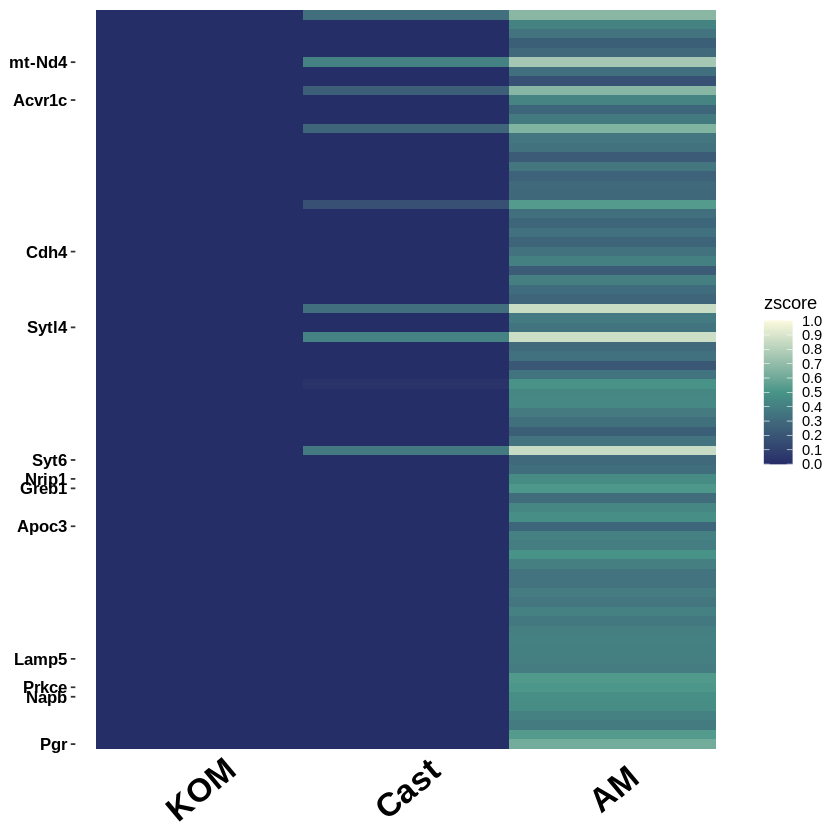

In [27]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =zscore,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=20,colour = "black",angle = 40, vjust =0.6,face="bold"),axis.text.y=element_text(size=10, colour = "black",face="bold"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.x = element_blank())+ scale_x_discrete(labels=c("Esr1KOM" = "KOM", "Cast" = "Cast",
                              "AM" = "AM"))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/heatmap_male_common_3groups_",low,"_",high,"_mini_color_adjusted.pdf",sep=""),width=2.5,height=5,paper="letter")

In [40]:
size
color

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20
[101] 20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[151] 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[176]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[201]  0  0  0  0  0  0  0  0  0  0 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0
[226]  0  0  0  0  0  0 20 20 20

[1] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [10] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [19] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [28] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [37] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [46] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [55] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [64] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [73] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [82] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [91] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[100] "black" "black" "black" "white" "white" "white" "white" "white" "white"
[109] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[118] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[127] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[136] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[145] "white" "white" "white" "white" "white" "white" "black" "black" "black"
[154] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[163] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[172] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[181] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[190] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[199] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[208] "white" "white" "white" "black" "black" "black" "black" "black" "black"
[217] "white" "white" "white" "white" "white" "white" "white" "white" "white"
[226] "white" "white" "white" "white" "white" "white" "black" "black" "black"

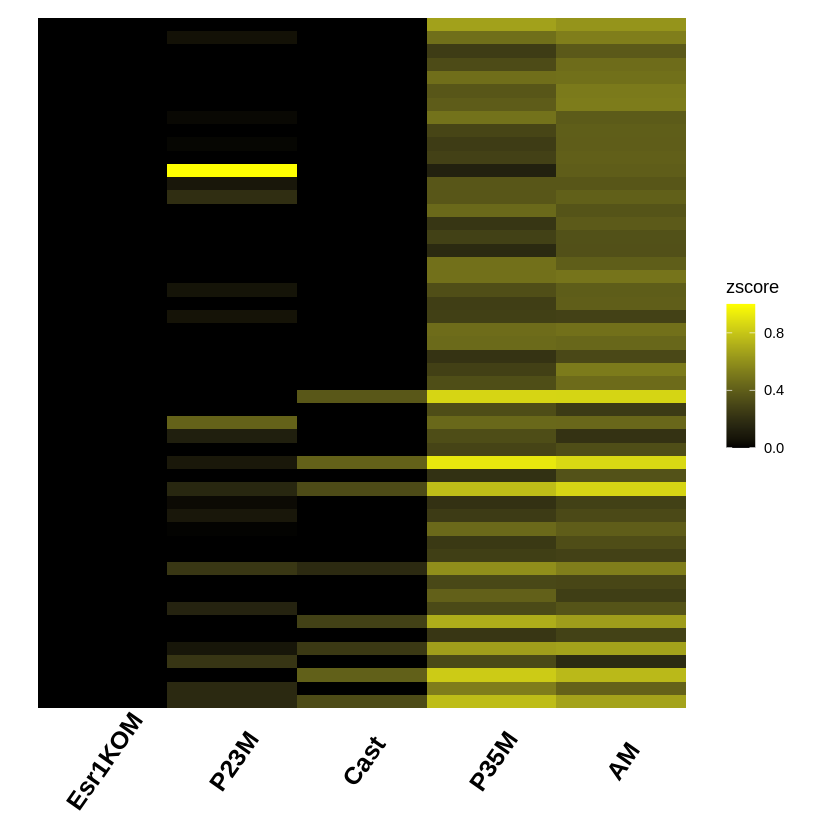

In [46]:
low<- -0.0
high<-1
p<-ggplot(Cell_number, aes(cluster, gene))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.4),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=15,colour = "black",angle = 55, vjust =0.6,face="bold"),axis.text.y=element_text(size=0,colour = "black"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank(), plot.margin = margin(10, 28, 10, 10))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/heatmap_male_common_5groups_",low,"_",high,"_mini.pdf",sep=""),width=2.5,height=6)

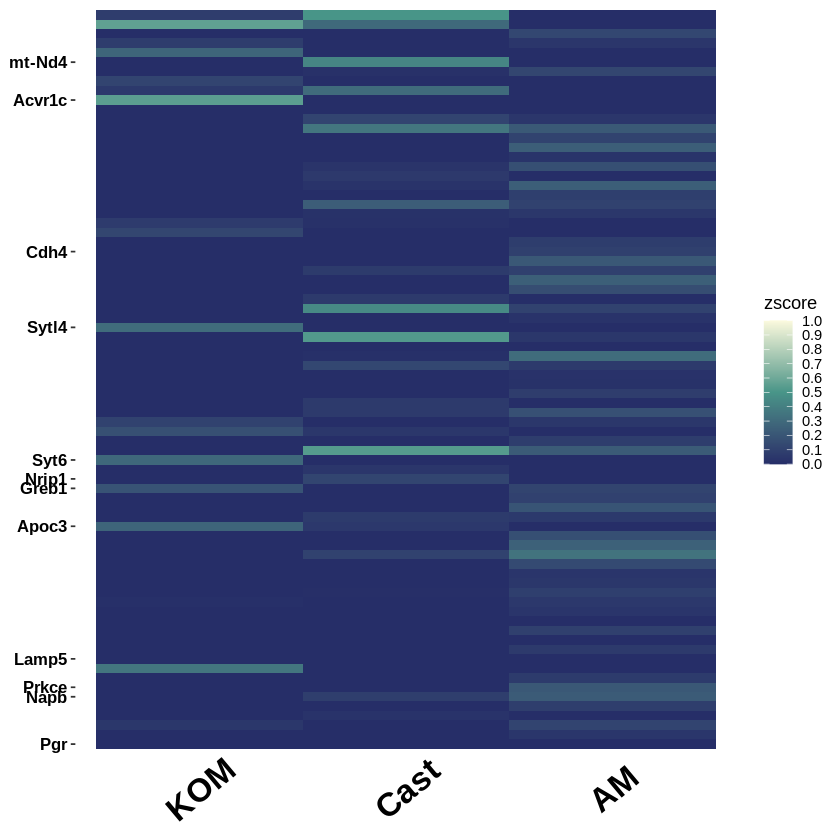

In [37]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =zscore,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=20,colour = "black",angle = 40, vjust =0.6,face="bold"),axis.text.y=element_text(size=10, colour = "black",face="bold"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.x = element_blank())+ scale_x_discrete(labels=c("Esr1KOM" = "KOM", "Cast" = "Cast",
                              "AM" = "AM"))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/heatmap_male_common_3groups_hormonelow_",low,"_",high,"_mini.pdf",sep=""),width=2.5,height=5,paper="letter")